In [1]:

def citire_fisier(fileName):
    a = 0
    b = 0
    with open(fileName) as f:
        lines = f.readlines()
        line = lines[0][:-1]
        a = float(line)
        
        line = lines[1][:-1]
        b = float(line)
    return a, b

def citire_tastatura():
    a = input()
    b = input()
    a = float(a)
    b = float(b)
    
    return a, b

In [2]:
a, b = citire_fisier("input.txt")
# a, b = citire_tastatura()
a

In [3]:
import math

def f1(x):
    return x*x - 12 * x + 30
def f1_derivata(x):
    return 2*x - 12

def f2(x):
    return math.sin(x) - math.cos(x)
def f2_derivata(x):
    return math.sin(x) + math.cos(x)

def f3(x):
    return 2 * x * x * x - 3 * x + 15
def f3_derivata(x):
    return 6*x*x - 3

In [4]:
import numpy as np
import random



def generare_x(n, a, b):
    #2X2 random float
    random_float_array = np.random.uniform(a, b, size=(n-2))
#     print(random_float_array)
    random_float_array.sort()
    x = []
    x.append(a)
    for elem in random_float_array:
        x.append(elem)
    x.append(b)
    return x

def generare_y(x, function):
    y = []
    for elem in x:
        y.append (function(elem))
    return y
    
    

In [5]:
def createBmm(x, m):
    n = len(x)
    Bmm = np.empty([m+1 ,m+1])
    for power in range(2*m + 1):
        suma = 0
        for i in range(n):
            suma += x[i] ** power
        
        if power <= m:
            inc = 0
        else:
            inc = power - m
        j = min(m, power)
        
        while j >= 0 and inc < m+1:
            Bmm[inc,j] = suma
            j-=1
            inc+=1
    
    return Bmm

def createFm(x, y, m):
    n = len(x)
    fm = []    
    for power in range(m+1):
        suma = 0
        for i in range(n):
            suma += y[i] * (x[i] ** power)
        fm.append(suma)
    return np.array(fm)



In [6]:
def metodaHorner(a, v, n):
    b0 = a[n]
    
    for i in range(n-1, -1, -1):
        b0 = a[i] + b0 * v
        
    return b0

In [7]:
def splinePatratice(xn, yn, x0, da):
    a0 = da
    n = len(xn)
    for i in range(n):
        
        hi = xn[i+1] - xn[i]
        a1 = -a0 + (2 * (yn[i+1] - yn[i])) / hi
        
        if x0 <= xn[i+1]:
            sol = ((a1 - a0) / (2 * hi)) * (x0 - xn[i]) * (x0 - xn[i]) + a0 * (x0 - xn[i]) + yn[i]
            return sol
        
    return None


In [8]:
xn = generare_x(10, a, b)
yn = generare_y(xn, f3)
Bmm = createBmm(xn, 6)
fm = createFm(xn, yn, 6)
am = np.linalg.solve(Bmm, fm)



suma = 0
for elem in np.arange(a, b, 0.1):
    suma +=metodaHorner(am, elem, 3)-splinePatratice(xn, yn, elem, f3_derivata(xn[0]))
    print(metodaHorner(am, elem, 3), splinePatratice(xn, yn, elem, f3_derivata(xn[0])), f3(elem))
print(suma / len( np.arange(a, b, 0.1)))
    
y0 = metodaHorner(am, 1.5, 3)
y0 = splinePatratice(xn, yn, 1.5, f1_derivata(xn[0]))
# print(y0)

15.000000000000526 15.0 15.0
14.70199999998266 14.706200304285248 14.702
14.41599999998 14.424801217140997 14.416
14.153999999968411 14.155802738567242 14.154
13.927999999923745 13.894656992139238 13.928
13.749999999821862 13.715901367830238 13.75
13.631999999638616 13.623758281485413 13.632
13.585999999349866 13.460482980303048 13.586
13.62399999893147 13.491973565984052 13.624
13.757999998359281 13.709316824104365 13.758
13.99999999760916 13.897874951520823 14.0
14.361999996656962 14.26682722800603 14.362
14.855999995478546 14.42713876515767 14.856000000000002
15.493999994049766 15.02497576559589 15.494
16.28799999234648 16.2565066972751 16.288
17.24999999034455 16.422302628607994 17.25
18.391999988019826 17.47177973880066 18.392000000000003
19.725999985348167 19.404938027853095 19.726000000000003
21.263999982305428 20.507536904496277 21.264000000000003
23.017999978867472 22.88743879191425 23.018
0.2224893062957583


1
5
1.1021746421517502e-22
0.10361103187350751


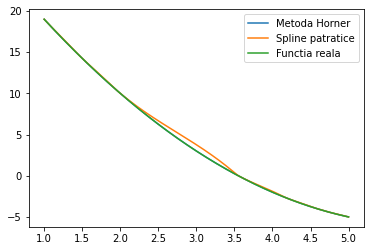

1.8634935140109884e-05


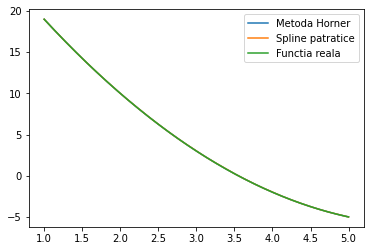

1.5952356033558854


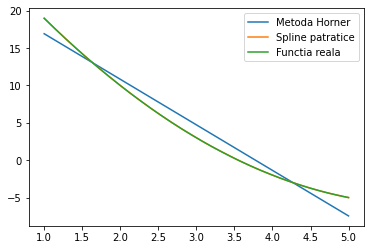

1
10
0
1.5
0.0299747156356986
3.5619391279857845e-08


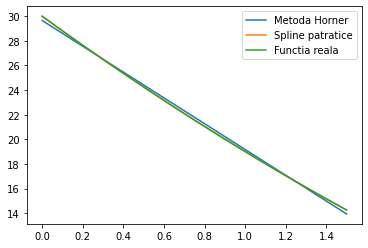

0
10
1.8492108468831677e-26
0.00022561885430098246


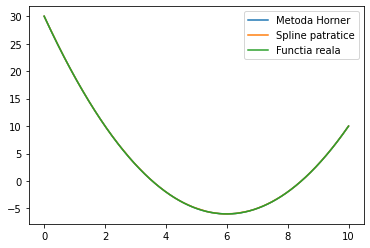

In [11]:
import PySimpleGUI as sg
import matplotlib.pyplot as plt 

a = 0
b = 0
Bmm = None
fm = None
am = None
xn = None
yn = None
tip = 1
m = 3
rata = 0.1
functii = {1:f1, 2:f2, 3:f3}
derivate = {1:f1_derivata, 2:f2_derivata, 3:f3_derivata};

layout = [[sg.Text("Introduceti nume fisier:")], 
           [sg.In(size=(25, 1), enable_events=True, key="EPS")],
          [sg.Button("CITESTE FISIER")],
          [sg.Button("CITESTE TASTATURA")],
    
        [sg.Text("Numar de puncte")], 
           [sg.In(size=(25, 1), enable_events=True, key="FIS1")],
          [sg.Button("GATA")],
          
          [sg.Text("Introduceti numerul functiei (1, 2, 3):")], 
           [sg.In(size=(25, 1), enable_events=True, key="F")],
          

          [sg.Button("Genereaza vector x")],
           [sg.Button("Genereaza vector y")],
          
          [sg.Text("Introduceti m:")], 
           [sg.In(size=(25, 1), enable_events=True, key="M")],
          [sg.Button("GATA m")],
          
          [sg.Button("Calculeaza B")],
          [sg.Button("Calculeaza f")],
          
          [sg.Button("Calculeaza coeficienti polinom")],
           [sg.Text(size=(50, 1), key="A")],
          
          [sg.Text("Introduceti rata testarii:")], 
           [sg.In(size=(25, 1), enable_events=True, key="RATA")],
          
          
          [sg.Button("Calculeaza eroare Horner")],
           [sg.Text(size=(40, 1), key="EROARE")],
          
          [sg.Button("Calculeaza eroare spline patratice")],
           [sg.Text(size=(40, 1), key="EROARE2")],
          
          [sg.Button("Deseneaza grafice")],
           
          [sg.Button("EXIT")]
         ]
window = sg.Window("Calcul numeric - Laborator 3", layout)

while True:
    event, values = window.read()
    
    
    if event == "EXIT":
        break
    elif event == "CITESTE FISIER":
        a, b = citire_fisier(values["EPS"])
        
    elif event == "CITESTE TASTATURA":
        a, b = citire_tastatura()
        
    elif event == "GATA":
        n = int(values["FIS1"])
        
    elif event == "Introduceti numerul functiei (1, 2, 3):":
        tip = int(values["F"])
        
    elif event == "Genereaza vector x":
        xn = generare_x(n, a, b)
        
    elif event == "Genereaza vector y":
        yn = generare_y(xn, functii[tip])
            
    elif event == "GATA m":
        m = int(values["M"])
        
    elif event == "Calculeaza B":
        Bmm = createBmm(xn, m)
    elif event == "Calculeaza f":    
        fm = createFm(xn, yn, m)
        
    elif event == "Calculeaza coeficienti polinom":   
        am = np.linalg.solve(Bmm, fm)
#         print(am)
        window["A"].update(np.flip(am))
        
    elif event == "Calculeaza eroare Horner":
        rata = float(values["RATA"])
        suma = 0
        for elem in np.arange(a, b, rata):
            err = abs(metodaHorner(am, elem, m)-functii[tip](elem))
            suma += err*err
        print(suma / len( np.arange(a, b, rata)))
        
        window["EROARE"].update(suma / len( np.arange(a, b, rata)))
        
    elif event == "Calculeaza eroare spline patratice":
        rata = float(values["RATA"])
        suma = 0
        for elem in np.arange(a, b, rata):
            err = abs(splinePatratice(xn, yn, elem, derivate[tip](elem))-functii[tip](elem))
            suma += err*err
        print(suma / len( np.arange(a, b, rata)))
        
        window["EROARE2"].update(suma / len( np.arange(a, b, rata)))
    
    elif event == "Deseneaza grafice":
        x = np.arange(a, b, rata) 
        y = np.array(list(map(functii[tip], x)))

        y1 = np.array([metodaHorner(am, elem, m) for elem in x])
        plt.plot(x, y1, label='Metoda Horner') 
        y2 = np.array([splinePatratice(xn, yn, elem, derivate[tip](elem)) for elem in x])
        plt.plot(x, y2, label='Spline patratice') 
        
        plt.plot(x, y,  label='Functia reala') 
        plt.legend()
        plt.show() 
        
    

window.close()

In [10]:
# x = np.arange(a, b, rata) 
# y = np.array(list(map(functii[tip], x)))

# plt.plot(x, y) 
# y = np.array([metodaHorner(am, elem, m) for elem in x])
# plt.plot(x, y) 
# y = np.array([splinePatratice(xn, yn, elem, derivate[tip](elem)) for elem in x])
# plt.plot(x, y) 
# plt.show() 